# PSHA and DSHA Model Calculations

#### PHSA Model Calculation - PSHA involves evaluating the likelihood of different levels of earthquake shaking at a specific location over a certain period

##### Import and Read the data

In [36]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px



In [37]:
# Import scaled earthquake data
df = pd.read_csv('../../Resources/earthquake_data.csv')
df.head()

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Applications/anaconda3/envs/dev/lib/python3.10/site-packages/IPython/core/formatters.py", line 223, in catch_format_error
    try:
  File "/Applications/anaconda3/envs/dev/lib/python3.10/site-packages/IPython/core/formatters.py", line 344, in __call__
    if method is not None:
  File "/Applications/anaconda3/envs/dev/lib/python3.10/site-packages/pandas/core/frame.py", line 1175, in _repr_html_
    else:
  File "/Applications/anaconda3/envs/dev/lib/python3.10/site-packages/pandas/io/formats/format.py", line 1074, in to_html
  File "/Applications/anaconda3/envs/dev/lib/python3.10/site-packages/pandas/io/formats/html.py", line 88, in to_string
    lines = self.render()
  File "/Applications/anaconda3/envs/dev/lib/python3.10/site-packages/pandas/io/formats/html.py", line 644, in render
    super().render()
  File "/Applications/anaconda3/envs/dev/lib/python3.10/site-packages/pandas/io/formats/html.py", line 94, in render
    self._write_table()


           id                              time  \
0  nc30092964  1995-12-28 18:28:01.230000+00:00   
1  nc30092581  1995-12-23 05:39:56.650000+00:00   
2  nc30092506  1995-12-22 09:00:34.560000+00:00   
3  nc30091857  1995-12-13 06:25:54.110000+00:00   
4  nc30094697  1995-12-13 05:45:12.760000+00:00   

                             place   longitude   latitude  depth  magnitude  \
0   9 km WNW of Topaz Lake, Nevada -119.654500  38.714500 -1.011       4.80   
1   8 km WNW of Topaz Lake, Nevada -119.633000  38.730500 -1.081       4.70   
2  California-Nevada border region -119.635000  38.721500  3.659       4.86   
3   9 km ESE of Gilroy, California -121.470333  36.982167  4.234       3.80   
4   9 km ESE of Gilroy, California -121.470000  36.976667  6.204       3.90   

   felt  cdi  mmi  ...  t_axis_plunge  percent_double_couple  scalar_moment  \
0   NaN  NaN  6.1  ...          8.496                   0.94   1.749000e+16   
1   NaN  NaN  NaN  ...          8.968                   0.83

##### Calculate the mean and standard deviation of the earthquake magnitudes 


In [38]:
# Calculate the mean and standard deviation of the earthquake magnitudes
mean_magnitude = df['magnitude'].mean()
std_magnitude = df['magnitude'].std()

In [39]:
# Generate a range of magnitudes
magnitude_range = np.linspace(df['magnitude'].min(), df['magnitude'].max(), 100)

In [40]:
# Calculate the probability density function for the range of magnitudes
pdf_magnitude = (1/(std_magnitude * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((magnitude_range - mean_magnitude)/std_magnitude)**2)

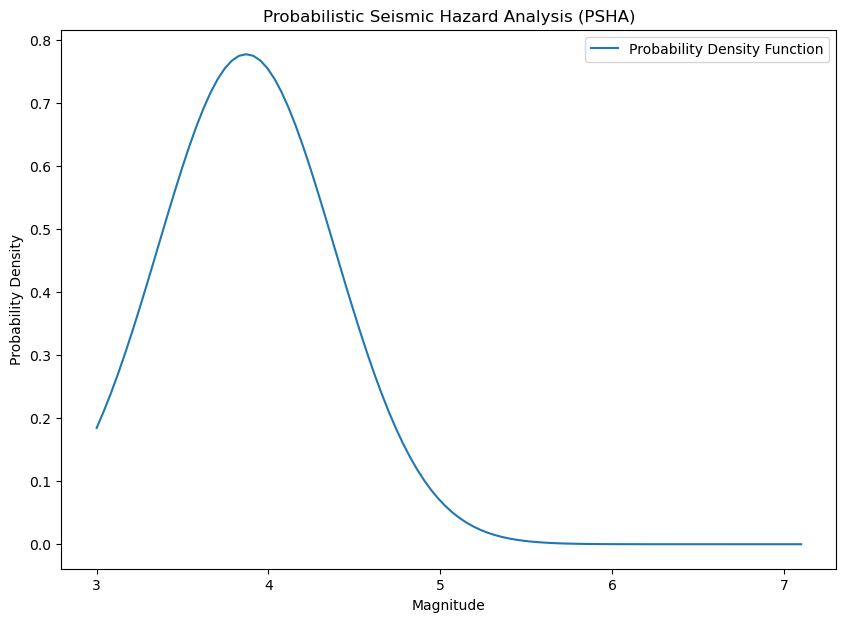

In [41]:
# Plot the probability density function
plt.figure(figsize=(10, 7))
plt.plot(magnitude_range, pdf_magnitude, label='Probability Density Function')
plt.xlabel('Magnitude')
plt.ylabel('Probability Density')
plt.title('Probabilistic Seismic Hazard Analysis (PSHA)')
plt.legend()
plt.show()

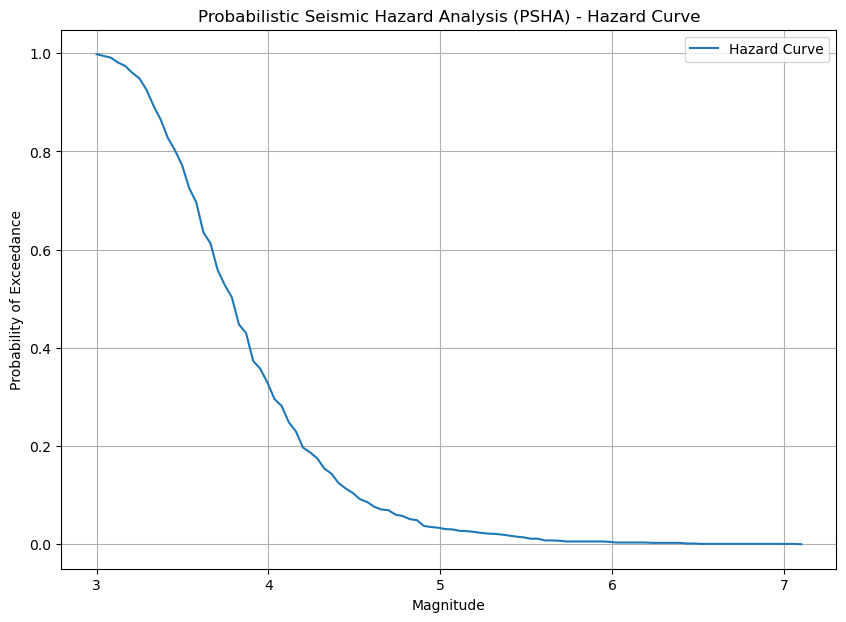

/var/folders/z7/8qp96g0d3r3b0tsph5j2f5m80000gn/T/ipykernel_21288/2970868989.py:24: RuntimeWarning:

divide by zero encountered in divide



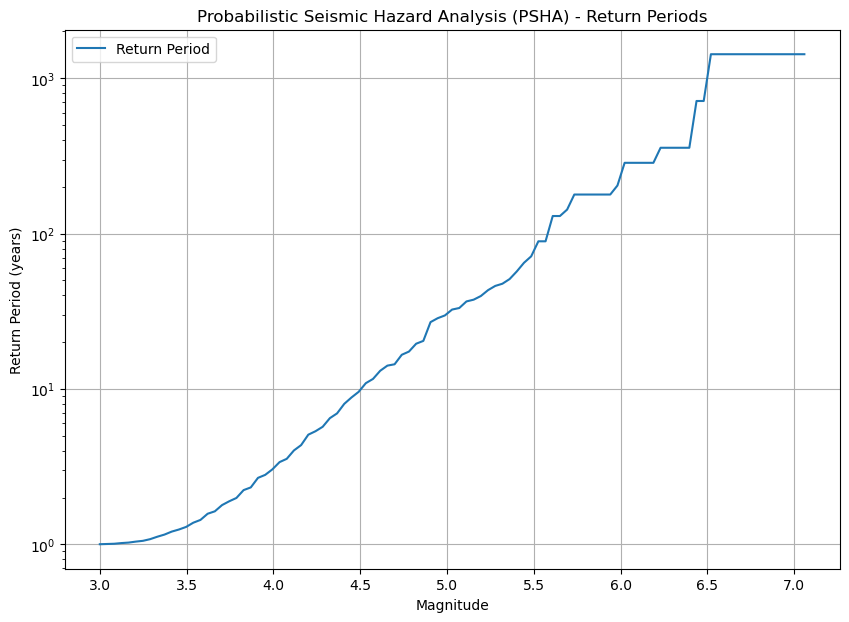

In [42]:
# Filter out non-positive magnitudes
df = df[df['magnitude'] > 0]

# Generate a range of magnitude levels for hazard curve
magnitude_levels = np.linspace(df['magnitude'].min(), df['magnitude'].max(), 100)

# Define a simple probabilistic model for exceedance probability
# Example: using a cumulative distribution function (CDF) of the normal distribution
mean_magnitude = df['magnitude'].mean()
std_magnitude = df['magnitude'].std()
exceedance_probabilities = 1 - np.array([np.sum(df['magnitude'] <= level) / len(df['magnitude']) for level in magnitude_levels])

# Plot the hazard curve
plt.figure(figsize=(10, 7))
plt.plot(magnitude_levels, exceedance_probabilities, label='Hazard Curve')
plt.xlabel('Magnitude')
plt.ylabel('Probability of Exceedance')
plt.title('Probabilistic Seismic Hazard Analysis (PSHA) - Hazard Curve')
plt.legend()
plt.grid(True)
plt.show()

# Calculate return periods (in years, assuming time frame of analysis is 1 year)
return_periods = 1 / exceedance_probabilities

# Plot return periods
plt.figure(figsize=(10, 7))
plt.plot(magnitude_levels, return_periods, label='Return Period')
plt.xlabel('Magnitude')
plt.ylabel('Return Period (years)')
plt.yscale('log')  # Log scale for better visibility of large ranges
plt.title('Probabilistic Seismic Hazard Analysis (PSHA) - Return Periods')
plt.legend()
plt.grid(True)
plt.show()

In [43]:
# Filter out non-positive magnitudes and check the data
df = df[df['magnitude'] > 0]

# Print data to ensure it's within expected ranges and for debugging purposes
print(df[['latitude', 'longitude', 'magnitude']].describe())
print(df.head())

# Normalize the magnitudes for sizing - Use a smaller range multiplier
df['magnitude_size'] = (df['magnitude'] - df['magnitude'].min()) / (df['magnitude'].max() - df['magnitude'].min()) * 5 + 1

# Filter data for earthquakes within the US region (approximate latitude and longitude ranges)
us_df = df[(df['latitude'] >= 25.0) & (df['latitude'] <= 49.0) & 
           (df['longitude'] >= -125.0) & (df['longitude'] <= -67.0)]

# Check if there are any data points in the filtered DataFrame
print("Filtered data points in the US region:", us_df.shape[0])
print(us_df.head())  # Print the first few rows to verify

# If there are data points, plot them
if not us_df.empty:
    # Create a scatter plot with Plotly
    fig = px.scatter_mapbox(us_df, lat='latitude', lon='longitude', 
                            color='magnitude', size='magnitude_size',
                            color_continuous_scale=px.colors.sequential.Turbo, size_max=8,  # Adjust size_max for dot sizes
                            zoom=3,
                            title="US Earthquake Data Visualization")

    # Update the layout with Mapbox style and centering on the US
    fig.update_layout(
        mapbox_style="open-street-map",
        mapbox_center={"lat": 37.0902, "lon": -95.7129},  # Center of the US
        mapbox_zoom=4,  # Adjust zoom level for better visibility
        margin={"r":0,"t":0,"l":0,"b":0}  # Remove margins
    )

    # Show the plot
    fig.show()
else:
    print("No data points found within the specified latitude and longitude bounds.")

          latitude    longitude    magnitude
count  1428.000000  1428.000000  1428.000000
mean     37.649464  -120.811440     3.870301
std       1.932531     2.313600     0.513061
min      31.523667  -124.664000     3.000000
25%      36.576500  -122.743375     3.500000
50%      37.678333  -121.252333     3.790000
75%      38.826375  -118.867625     4.110000
max      41.867700  -111.094000     7.100000
           id                              time  \
0  nc30092964  1995-12-28 18:28:01.230000+00:00   
1  nc30092581  1995-12-23 05:39:56.650000+00:00   
2  nc30092506  1995-12-22 09:00:34.560000+00:00   
3  nc30091857  1995-12-13 06:25:54.110000+00:00   
4  nc30094697  1995-12-13 05:45:12.760000+00:00   

                             place   longitude   latitude  depth  magnitude  \
0   9 km WNW of Topaz Lake, Nevada -119.654500  38.714500 -1.011       4.80   
1   8 km WNW of Topaz Lake, Nevada -119.633000  38.730500 -1.081       4.70   
2  California-Nevada border region -119.635000  38.

#### DSHA Model Calculation - evaluates the impact of specific earthquake scenarios, often the largest credible earthquake.

In [44]:
# Identify the largest earthquake magnitude
max_magnitude = df['magnitude'].max()
max_eq = df[df['magnitude'] == max_magnitude]

In [45]:
# Print the largest earthquake magnitude
print('Deterministic Seismic Hazard Analysis (DSHA)')
print('Largest Credible Earthquake Magnitude:', max_magnitude)

Deterministic Seismic Hazard Analysis (DSHA)
Largest Credible Earthquake Magnitude: 7.1


<Axes: xlabel='longitude', ylabel='latitude'>

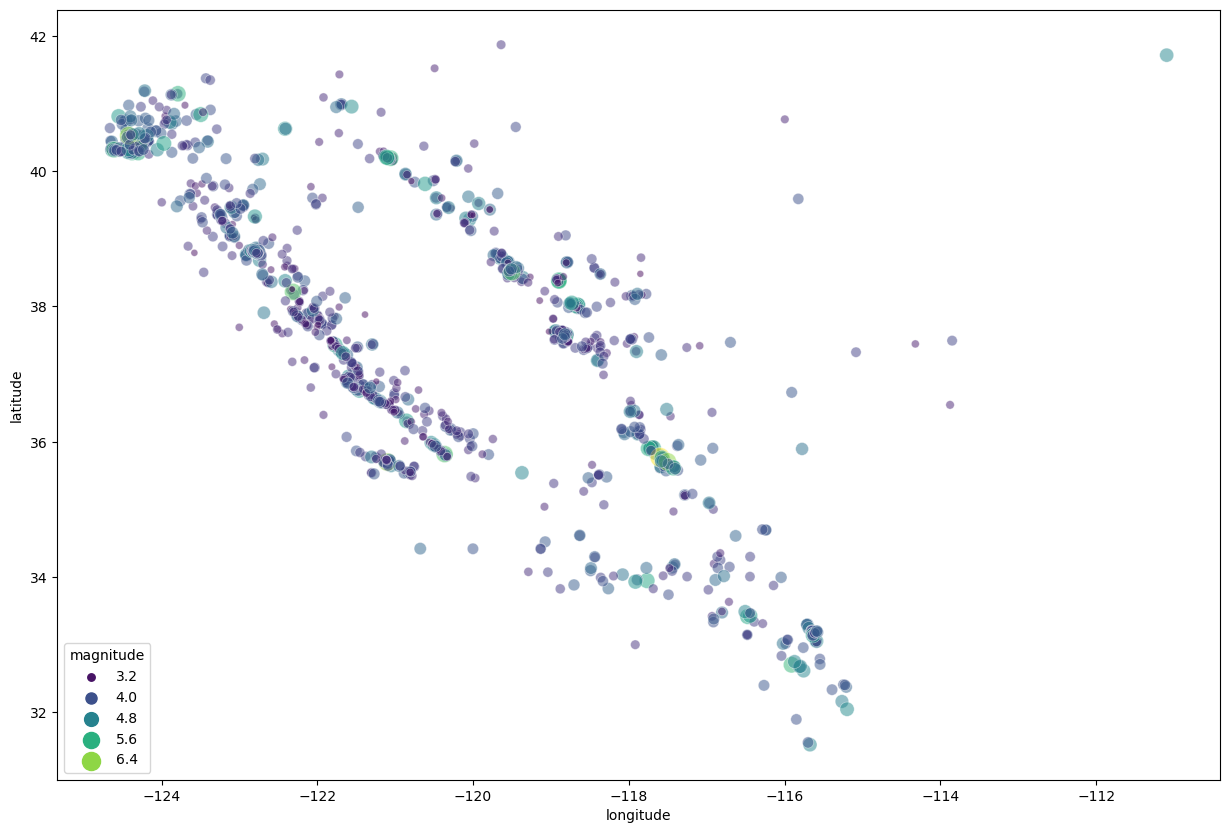

In [46]:
# Plot all earthquakes
plt.figure(figsize=(15, 10))
sns.scatterplot(x='longitude', y='latitude', size='magnitude', hue='magnitude', data=df, sizes=(20, 200), alpha=0.5, palette='viridis')


In [47]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Filter out non-positive magnitudes
df = df[df['magnitude'] > 0]

# Normalize the magnitudes for sizing
df['magnitude_size'] = (df['magnitude'] - df['magnitude'].min()) / (df['magnitude'].max() - df['magnitude'].min()) * 5 + 1

# Filter data for earthquakes within the US region (approximate latitude and longitude ranges)
us_df = df[(df['latitude'] >= 25.0) & (df['latitude'] <= 50.0) & 
           (df['longitude'] >= -125.0) & (df['longitude'] <= -65.0)]

# Create a scatter plot with Plotly
fig = px.scatter_mapbox(us_df, lat='latitude', lon='longitude', 
                        color='magnitude', size='magnitude_size',
                        color_continuous_scale=px.colors.cyclical.IceFire, size_max=10, zoom=3,
                        title="US Earthquake Data Visualization")

# Update the layout with Mapbox style and centering on the US
fig.update_layout(
    mapbox_style="open-street-map",
    mapbox_center={"lat": 37.0902, "lon": -95.7129},  # Center of the US
    mapbox_zoom=3,  # Adjust zoom level as needed
    margin={"r":0,"t":30,"l":0,"b":0},  # Adjust margins to make the plot fit well
    legend=dict(yanchor="top", y=0.99, xanchor="left", x=0.01),  # Position the legend inside the map
)

# Show the plot
fig.show()